# Project-7 (NLP Project for Disaster Tweet Classification):

In [1]:
# Import Libraries:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# ◆ Upload the given dataset "twitter_disaster.csv":

In [3]:
td_data = pd.read_csv(r"C:/Users/HP/Desktop/Digi-crome/Project-7_NLP/Data/twitter_disaster.csv")

In [4]:
td_data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [5]:
td_data.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
td_data.tail(5)

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [7]:
td_data.shape

(7613, 5)

# ◆ Explore the dataset's structure:

In [11]:
td_data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [13]:
td_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
td_data.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

# Check Missing Values:

In [10]:
td_data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

# ◆ Visualize the distribution of classes (disaster vs. non-disaster tweets):

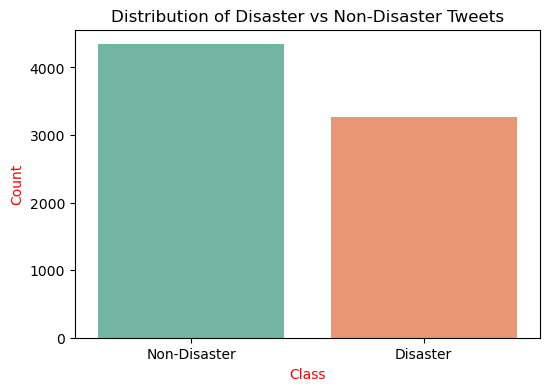

In [27]:
#Using Bar Plot:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=td_data, palette='Set2')
plt.title('Distribution of Disaster vs Non-Disaster Tweets')
plt.xlabel('Class', color='red')
plt.ylabel('Count',color='red')
plt.xticks([0, 1], ['Non-Disaster', 'Disaster'])
plt.show()

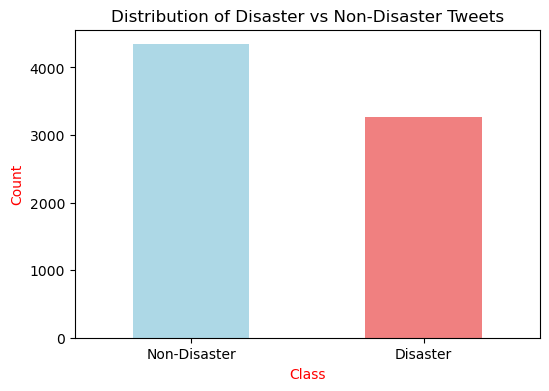

In [28]:
#Using Histogram Plot:
plt.figure(figsize=(6, 4))
td_data['target'].value_counts().plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Distribution of Disaster vs Non-Disaster Tweets')
plt.xlabel('Class',color='red')
plt.ylabel('Count',color='red')
plt.xticks([0, 1], ['Non-Disaster', 'Disaster'], rotation=0)
plt.show()

# ◆ Analyze the frequency of keywords:

In [43]:
# Filter disaster-related tweets
disaster_tweets = td_data[td_data['target'] == 1]['text']
non_disaster_tweets = td_data[td_data['target'] ==0]['text']